In [1]:
import pandas as pd 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

importing data

In [3]:
df_candid = pd.read_excel(r"C:/Users/tarun/Documents/delhi election 2025.xlsx")

In [4]:
!pip install openpyxl


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
df_candid

,Constituency,Candidate,Party,Votes Brought From Previous Rounds,Current Round,Total
0,ADARSH NAGAR,ABDUL ZABBAR,Bahujan Samaj Party,334,9,343
1,ADARSH NAGAR,MUKESH KUMAR GOEL,Aam Aadmi Party,39156,1785,40941
2,ADARSH NAGAR,RAJ KUMAR BHATIA,Bharatiya Janata Party,50045,2215,52260
3,ADARSH NAGAR,SHIVANK SINGAL,Indian National Congress,5202,240,5442
4,ADARSH NAGAR,PRIYA,"Aam Janmat Party,",54,2,56
...,...,...,...,...,...,...
764,WAZIRPUR,MAHESH BANSAL,Right to Recall Party,64,0,64
765,WAZIRPUR,SHEELA DEVI,Garib Ekta Party,63,0,63
766,WAZIRPUR,AAKASH GOEL,Independent,229,4,233
767,WAZIRPUR,MUKESH JAIN,Independent,169,4,173


In [6]:
df_electors = pd.read_csv(r"F:\New folder (2)\New folder\New folder (3)\voters.csv")

In [7]:
df_electors

,District Name,Constituency No.,Constituency,Male electors,Female electors,Third gender electors,Total
0,North-west,6.0,RITHALA,167284,152566,22,319872
1,North-west,8.0,MUNDKA,163998,145832,6,309836
2,North-west,9.0,KIRARI,175815,143153,38,319006
3,North-west,10.0,SULTANPUR MAJRA,97797,88382,54,186233
4,North-west,12.0,MANGOL PURI,98047,91256,15,189318
...,...,...,...,...,...,...,...
77,South-East,52.0,TUGHLAKABAD,118107,86446,8,204561
78,South-East,53.0,BADARPUR,202595,159974,52,362621
79,South-East,54.0,OKHLA,219300,160205,4,379509
80,NaN,NaN,South-East Total,927740,721425,92,1649257


In [8]:
df_voted = pd.read_csv(r"F:\New folder (2)\New folder\New folder (3)\voted.csv")

In [9]:
df_voted

,CNST_NAME,CNST_NO,PC_No,PC_Name,Turnout at 5:00 PM (%),Male Voters,Female Voters,Other,Total,Turnout (%)
0,NERELA,1.0,5.0,NORTH WEST DELHI,60.00,93833,79908,2,173743,61.85
1,BURARI,2.0,2.0,NORTH EAST DELHI,56.16,135464,118073,11,253548,59.48
2,TIMARPUR,3.0,2.0,NORTH EAST DELHI,53.29,64530,56448,10,120988,55.98
3,ADARSH NAGAR,4.0,1.0,CHANDNI CHOWK,53.80,53888,46199,14,100101,56.43
4,BADLI,5.0,5.0,NORTH WEST DELHI,60.88,81516,68958,21,150495,63.03
...,...,...,...,...,...,...,...,...,...,...
66,BABARPUR,67.0,2.0,NORTH EAST DELHI,63.64,75952,66657,10,142619,65.86
67,GOKALPUR,68.0,2.0,NORTH EAST DELHI,65.04,88044,76883,4,164931,68.29
68,MUSTAFABAD,69.0,2.0,NORTH EAST DELHI,66.68,108505,92135,3,200643,69.01
69,KARAWAL NAGAR,70.0,2.0,NORTH EAST DELHI,62.74,109113,91354,9,200476,64.40


In [10]:
#removing unvonted columns

In [11]:
df_candid = df_candid.drop(columns=["Votes Brought From Previous Rounds", "Current Round"])

In [12]:
df_voted = df_voted.drop(columns=["PC_No","PC_Name", "Turnout at 5:00 PM (%)"])

In [13]:
#merging voters data to single table

In [14]:
df_Voter = pd.merge(df_electors, df_voted, left_on="Constituency", right_on="CNST_NAME")

df_Voter = df_Voter.drop(columns=["CNST_NAME", "CNST_NO", ])

In [15]:
df_Voter = df_Voter.sort_values(by="Constituency No.")

In [16]:
# Calculate inactive voters (total elector - total voted)
df_Voter["inactive_voter"] = df_Voter["Total_x"] - df_Voter["Total_y"]

In [17]:
df_Voter

,District Name,Constituency No.,Constituency,Male electors,Female electors,Third gender electors,Total_x,Male Voters,Female Voters,Other,Total_y,Turnout (%),inactive_voter
44,North,1.0,NERELA,151980,127845,9,279834,93833,79908,2,173743,61.85,106091
17,Central,2.0,BURARI,228702,191426,29,420157,135464,118073,11,253548,59.48,166609
18,Central,3.0,TIMARPUR,115604,99462,34,215100,64530,56448,10,120988,55.98,94112
45,North,4.0,ADARSH NAGAR,96847,80517,47,177411,53888,46199,14,100101,56.43,77310
46,North,5.0,BADLI,130522,107385,40,237947,81516,68958,21,150495,63.03,87452
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,North-east,66.0,GHONDA,122498,105338,1,227837,75123,64879,1,140003,61.03,87834
62,Shahdara,67.0,BABARPUR,114617,101841,15,216473,75952,66657,10,142619,65.86,73854
9,North-east,68.0,GOKALPUR,128563,109972,7,238542,88044,76883,4,164931,68.29,73611
10,North-east,69.0,MUSTAFABAD,155706,133193,3,288902,108505,92135,3,200643,69.01,88259


In [18]:
# top 5 active constituency
active_const = df_Voter.sort_values(by="Turnout (%)",ascending=False ).head(5)
active_const 

,District Name,Constituency No.,Constituency,Male electors,Female electors,Third gender electors,Total_x,Male Voters,Female Voters,Other,Total_y,Turnout (%),inactive_voter
10,North-east,69.0,MUSTAFABAD,155706,133193,3,288902,108505,92135,3,200643,69.01,88259
7,North-east,65.0,SEELAMPUR,100866,91266,4,192136,71130,61951,1,133082,68.71,59054
9,North-east,68.0,GOKALPUR,128563,109972,7,238542,88044,76883,4,164931,68.29,73611
62,Shahdara,67.0,BABARPUR,114617,101841,15,216473,75952,66657,10,142619,65.86,73854
61,Shahdara,64.0,ROHTAS NAGAR,113558,105595,25,219178,75732,67718,13,143463,65.30,75715


In [19]:
# least 5 active constituency
inactive_const = df_Voter.sort_values(by="Turnout (%)").head(5)
inactive_const

,District Name,Constituency No.,Constituency,Male electors,Female electors,Third gender electors,Total_x,Male Voters,Female Voters,Other,Total_y,Turnout (%),inactive_voter
13,South,45.0,MEHRAULI,118855,97536,13,216404,61838,53578,3,115419,53.02,100985
51,North,18.0,MODEL TOWN,97234,80709,1,177944,51903,44045,0,95948,53.62,81996
56,New Delhi,44.0,R K PURAM,76676,63548,5,140229,40383,35631,3,76017,54.01,64212
12,South,43.0,MALVIYA NAGAR,83067,72641,4,155712,44563,39925,3,84491,54.07,71221
64,South-East,42.0,KASTURBA NAGAR,85056,70417,5,155478,45768,38378,2,84148,54.15,71330


In [20]:
#sex_ratio in ever constituency
for x in df_Voter.iterrows():
   df_Voter["elector_sex_ratio"] = (df_Voter["Female electors"] /  df_Voter["Male electors"] )*1000

In [21]:
print(df_Voter[["Constituency", "elector_sex_ratio","Turnout (%)"]])

     Constituency  elector_sex_ratio  Turnout (%)
44         NERELA         841.196210        61.85
17         BURARI         837.010608        59.48
18       TIMARPUR         860.368153        55.98
45   ADARSH NAGAR         831.383522        56.43
46          BADLI         822.734865        63.03
..            ...                ...          ...
8          GHONDA         859.916080        61.03
62       BABARPUR         888.533115        65.86
9        GOKALPUR         855.393854        68.29
10     MUSTAFABAD         855.413407        69.01
11  KARAWAL NAGAR         813.525158        64.40

[70 rows x 3 columns]


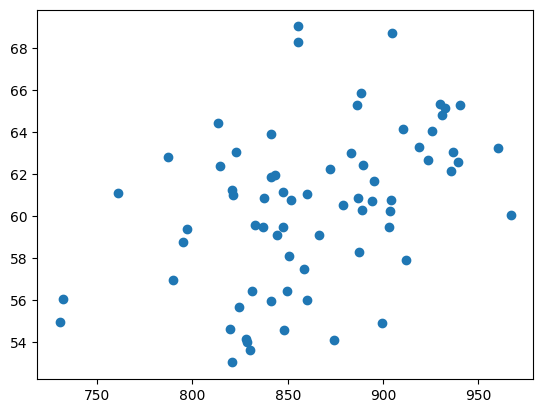

In [22]:
#relation B/w sex_ratio and turnout
plt.scatter(df_Voter["elector_sex_ratio"],df_Voter["Turnout (%)"])

<Axes: xlabel='elector_sex_ratio', ylabel='Turnout (%)'>

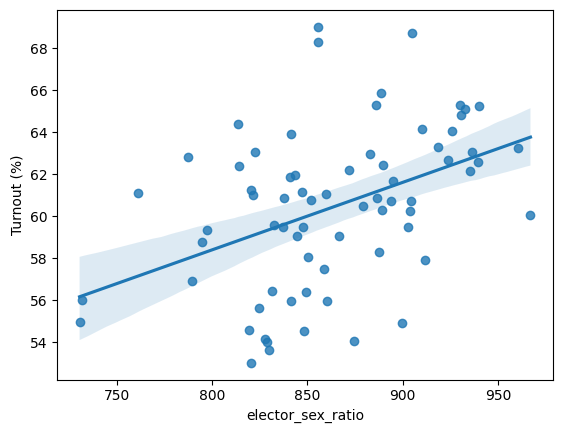

In [23]:
sns.regplot(x=df_Voter["elector_sex_ratio"],y=df_Voter["Turnout (%)"])
#high elector_sex_ratio = better participation in electio

In [24]:
#avg % of male vs female voters
for x in df_Voter.iterrows():
   df_Voter["male%"] = (df_Voter["Male Voters"] /  df_Voter["Male electors"] )*100

In [25]:
for x in df_Voter.iterrows():
   df_Voter["female%"] = (df_Voter["Female Voters"] /  df_Voter["Female electors"] )*100

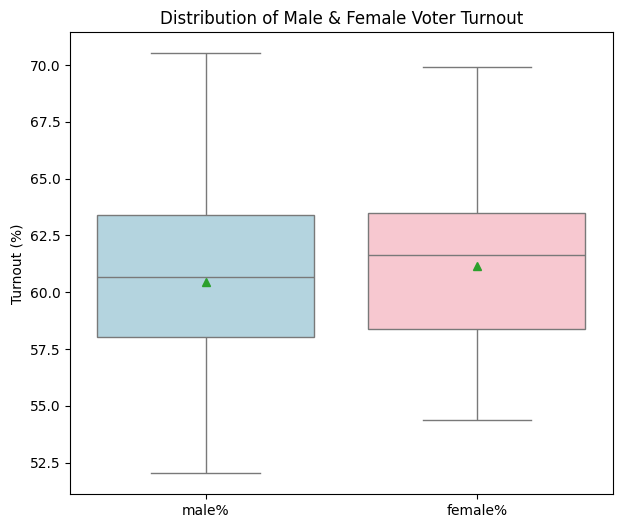

In [26]:
plt.figure(figsize=(7,6))
sns.boxplot(data=df_Voter[["male%", "female%"]], palette=["lightblue", "pink"],showmeans=True)
plt.ylabel("Turnout (%)")
plt.title("Distribution of Male & Female Voter Turnout")
plt.show()
#women are more active voter then men ( slightly)

In [27]:
#finding how many voter support ever candidate got
vote_share = df_candid.merge(df_voted, left_on="Constituency", right_on="CNST_NAME", suffixes=('_w', '_v'))

# Calculating voter support
vote_share['voter_support'] = (vote_share['Total_w'] / vote_share['Total_v']) * 100

# Sorting by voter support in descending order in every constituency
vote_share = vote_share.sort_values(by=['Constituency','voter_support'], ascending=[True,False])

# Display the result


In [28]:
vote_share

,Constituency,Candidate,Party,Total_w,CNST_NAME,CNST_NO,Male Voters,Female Voters,Other,Total_v,Turnout (%),voter_support
2,ADARSH NAGAR,RAJ KUMAR BHATIA,Bharatiya Janata Party,52260,ADARSH NAGAR,4.0,53888,46199,14,100101,56.43,52.207271
1,ADARSH NAGAR,MUKESH KUMAR GOEL,Aam Aadmi Party,40941,ADARSH NAGAR,4.0,53888,46199,14,100101,56.43,40.899691
3,ADARSH NAGAR,SHIVANK SINGAL,Indian National Congress,5442,ADARSH NAGAR,4.0,53888,46199,14,100101,56.43,5.436509
14,ADARSH NAGAR,NOTA,None of the Above,374,ADARSH NAGAR,4.0,53888,46199,14,100101,56.43,0.373623
0,ADARSH NAGAR,ABDUL ZABBAR,Bahujan Samaj Party,343,ADARSH NAGAR,4.0,53888,46199,14,100101,56.43,0.342654
...,...,...,...,...,...,...,...,...,...,...,...,...
766,WAZIRPUR,AAKASH GOEL,Independent,233,WAZIRPUR,17.0,57327,49013,0,106340,55.65,0.219109
763,WAZIRPUR,DEVENDER KUMAR,Communist Party of India,190,WAZIRPUR,17.0,57327,49013,0,106340,55.65,0.178672
767,WAZIRPUR,MUKESH JAIN,Independent,173,WAZIRPUR,17.0,57327,49013,0,106340,55.65,0.162686
764,WAZIRPUR,MAHESH BANSAL,Right to Recall Party,64,WAZIRPUR,17.0,57327,49013,0,106340,55.65,0.060184


In [29]:
vote_share = vote_share.drop(columns=["CNST_NAME", "CNST_NO","Male Voters","Female Voters","Other", "Total_v" ,"Turnout (%)"])

In [30]:
#who won constituency
winner_candidate =vote_share.loc[df_candid.groupby("Constituency")["Total"].idxmax()]
winner =pd.DataFrame(winner_candidate )

In [31]:
winner = winner_candidate.reset_index(drop=True)

In [32]:
#most influencer winners
best_winner=winner.sort_values('voter_support' , ascending = False , inplace = False).head(10)

In [33]:
color_map = {"Bharatiya Janata Party": "#FF9933", "Aam Aadmi Party": "#007ACC"}  # BJP = Orange, AAP = Blue
# Ensure all parties have a defined color
colors = [color_map.get(party, "gray") for party in best_winner["Party"]]

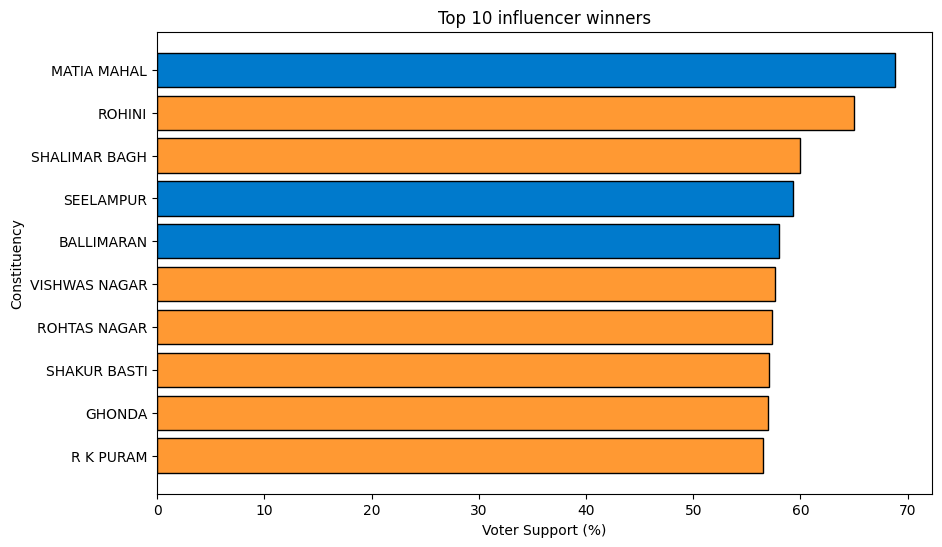

In [34]:

plt.figure(figsize=(10, 6))

# Create a horizontal bar chart
plt.barh(best_winner["Constituency"], best_winner["voter_support"], color=colors, edgecolor="black")

# Invert the Y-axis so the highest voter support appears on top
plt.gca().invert_yaxis()

# Add labels and title
plt.xlabel("Voter Support (%)")
plt.ylabel("Constituency")
plt.title("Top 10 influencer winners")

# Show the plot
plt.show()

In [35]:
best_winner

,Constituency,Candidate,Party,Total_w,voter_support
32,MATIA MAHAL,AALEY MOHAMMED IQBAL,Aam Aadmi Party,58041,68.827673
51,ROHINI,VIJENDER GUPTA,Bharatiya Janata Party,69890,64.955343
59,SHALIMAR BAGH,REKHA GUPTA,Bharatiya Janata Party,67839,59.910980
55,SEELAMPUR,CHAUDHARY ZUBAIR AHMAD,Aam Aadmi Party,78866,59.261207
5,BALLIMARAN,IMRAN HUSSAIN,Aam Aadmi Party,56932,58.023421
68,VISHWAS NAGAR,OM PRAKASH SHARMA,Bharatiya Janata Party,71672,57.640095
52,ROHTAS NAGAR,JITENDER MAHAJAN,Bharatiya Janata Party,82299,57.366011
58,SHAKUR BASTI,KARNAIL SINGH,Bharatiya Janata Party,56570,57.022186
15,GHONDA,AJAY MAHAWAR,Bharatiya Janata Party,79706,56.931637
47,R K PURAM,ANIL KUMAR SHARMA,Bharatiya Janata Party,42965,56.520252


In [36]:
#constituency with highest competetion acrose the parties ( not just bjp and AAP)
close_winner=winner.sort_values('voter_support' , ascending = True , inplace = False).head(10)

In [37]:
color_2 = [color_map.get(party, "gray") for party in close_winner["Party"]]

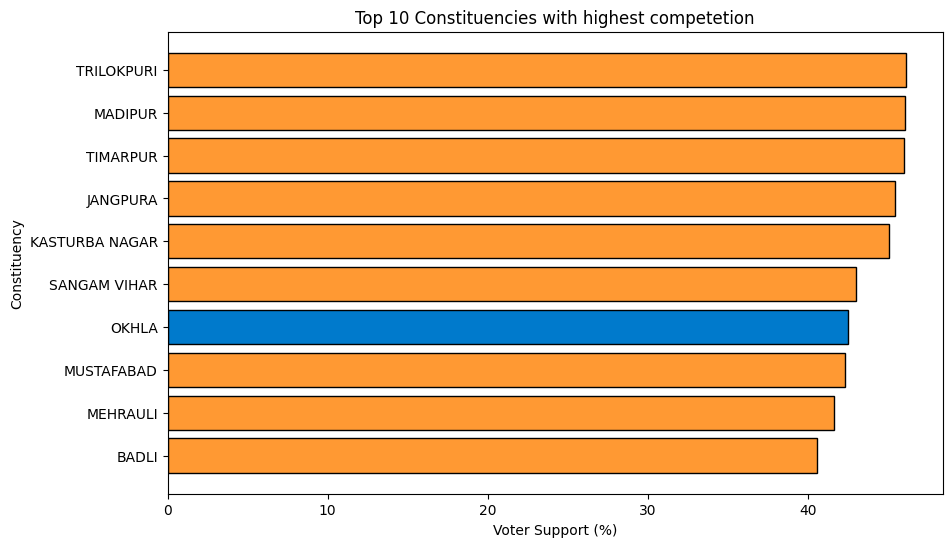

In [38]:
# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(close_winner["Constituency"], close_winner["voter_support"], color=color_2, edgecolor="black")

# Add labels and title
plt.xlabel("Voter Support (%)")
plt.ylabel("Constituency")
plt.title("Top 10 Constituencies with highest competetion")

# Show the plot
plt.show()

In [39]:
# best candidates from bjp 
best_bjp = vote_share[vote_share["Party"] == "Bharatiya Janata Party"].sort_values(by="voter_support", ascending=False).head(5)

In [40]:
best_bjp

,Constituency,Candidate,Party,Total_w,voter_support
563,ROHINI,VIJENDER GUPTA,Bharatiya Janata Party,69890,64.955343
658,SHALIMAR BAGH,REKHA GUPTA,Bharatiya Janata Party,67839,59.910980
748,VISHWAS NAGAR,OM PRAKASH SHARMA,Bharatiya Janata Party,71672,57.640095
572,ROHTAS NAGAR,JITENDER MAHAJAN,Bharatiya Janata Party,82299,57.366011
648,SHAKUR BASTI,KARNAIL SINGH,Bharatiya Janata Party,56570,57.022186


In [41]:
# best candidates from AAP 
best_aap = vote_share[vote_share["Party"] == "Aam Aadmi Party"].sort_values(by="voter_support", ascending=False).head(5)

In [42]:
best_aap

,Constituency,Candidate,Party,Total_w,voter_support
343,MATIA MAHAL,AALEY MOHAMMED IQBAL,Aam Aadmi Party,58041,68.827673
613,SEELAMPUR,CHAUDHARY ZUBAIR AHMAD,Aam Aadmi Party,78866,59.261207
60,BALLIMARAN,IMRAN HUSSAIN,Aam Aadmi Party,56932,58.023421
135,DEOLI,PREM CHAUHAN,Aam Aadmi Party,86774,55.117350
107,CHANDNI CHOWK,PUNARDEEP SINGH SAWHNEY (SABBY),Aam Aadmi Party,38932,54.819133


In [43]:
# best candidates from INC
best_cong = vote_share[vote_share["Party"] == "Indian National Congress"].sort_values(by="voter_support", ascending=False).head(5)

In [44]:
best_cong

,Constituency,Candidate,Party,Total_w,voter_support
268,KASTURBA NAGAR,ABHISHEK DUTT,Indian National Congress,26918,31.988877
49,BADLI,DEVENDER YADAV,Indian National Congress,40980,27.230141
441,NANGLOI JAT,ROHIT CHOUDHARY,Indian National Congress,31918,20.104434
319,MADIPUR,J. P. PANWAR,Indian National Congress,17878,15.888448
63,BALLIMARAN,HAROON YUSUF,Indian National Congress,13038,13.287946


                                                    **Conclusion**
**The constituency with the most active voters is Mustafabad** <br>
 -- this high vote turnout might be because of Delhi Riots 2020 as all 5 constituencies with highest voter turnout were affected by roits <br>
**The constituency with the least active voters is Mehrauli (53.02%)** <br>
 --Naresh Yadav was initially going to contest from AAP, but his candidacy changed just before the election. He then joined BJP which created        confusion among electors resulting in lowest turnout <br>
**Women are more active voters than men** <br>
  --Women-Centric Welfare Policies encourage women to vote  <br>
**A high sex ratio is a factor for high turnout** <br>
--Households with more women voters tend to vote more so they can benefit from Women-Centric Welfare Policies <br>
**The most influential candidate is Aaley Mohammed Iqbal from AAP in the Matia Mahal constituency (68.82%)** <br>
--Aaley Mohammad Iqbal emphasized that his success was the result of consistent public engagement since his political debut at the age of 22 <br>
**The constituency with the highest competition is Badli** <br>
--In Badli, the contest was not just between two candidates (AAP & BJP) but involved all three major parties  <br>
**The best candidate from bjp**  vijendet gupta form rohini (64.95%) <br>
**The best candidate from AAP**  aaley mohammed iqbal from matia mahal (68.82%) <br>
**The best candidate from INC**  Abhishek dutt from kasturba nagar ( 31.98%) <br>
**Kasturba Nagar is only constituency where INC was runner_up In all other constituencies, INC finished in third place** <br>
--Abhishek Dutt has been an active figure in the Kasturba Nagar area <br>
<pre>
in 2020 election candidates were              in 2025 election candidates were      <br>
Madan Lal           AAP                       Ramesh Pehalwan      AAP <br>
Ravinder Choudhry   BJP                     	Neeraj Basoya        BJP <br> 
Abhishek Dutt       INC                       Abhishek Dutt        INC <br>
</pre>
--Abhishek Dutt remains the only well-known candidate in Kasturba Nagar, resulting in a higher vote share for him 
